In [194]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)


df2 = pd.read_csv('slideseqv2/slideseqv2_niche.csv',index_col=0)

df2[['spicemix'+str(i) for i in range(10)]] = pd.read_csv('slideseqv2/slideseqv2_niche_spicemix.csv',index_col=0).iloc[:,:-1]
df2[[s.replace("2k","") for s in pd.read_csv('slideseqv2/slideseqv2_niche_2k.csv',index_col=0).columns[:-1]]] = pd.read_csv('slideseqv2/slideseqv2_niche_2k.csv',index_col=0).iloc[:,:-1]

df2 = df2.T
df2['tmp'] = 0
df2['tmp'][-1] = 'Batch correction'
df2 = df2.T

df2 = df2.drop(index='nmi_ari_cluster_labels_leiden_ari')

bm._results = df2
df2_ = bm.get_results(min_max_scale=False).T
df2_ = df2_.T

df_.index = [col.replace('simvi2k_z', 'simvi_d') if 'simvi2k_z' in col else col for col in df_.index]
df2_.index = [col.replace('simvi2k_s', 'simvi_d') if 'simvi2k_s' in col else col for col in df2_.index]

df2_['Total_rescaled'] = 0
df2_['Total_rescaled'][:-1] = (df2_['Bio conservation'][:-1] - df2_['Bio conservation'][:-1].min()) / (df2_['Bio conservation'][:-1].max() - df2_['Bio conservation'][:-1].min())

df_f = df2_



df_f['name'] = df_f.index.str[:-1]
df_summary_mean = df_f.iloc[:-1].groupby('name').mean()
df_summary_std = df_f.iloc[:-1].groupby('name').std()
df_summary_mean


df_summary_mean = df_summary_mean.iloc[[6,0,1,3,5,10,8,9,7]]
df_summary_std = df_summary_std.iloc[[6,0,1,3,5,10,8,9,7]]

df_summary_mean.index=['scVI','GraphST','STAGATE','CellCharter','NSF','SpiceMix','Graph Only','Graph Only + cell type (NCEM)', 'SIMVI']
df_summary_std.index = df_summary_mean.index

df_summary_mean = df_summary_mean.iloc[:,[1]]
df_summary_std = df_summary_std.iloc[:,[1]]

df_summary_mean.columns = ['Silhouette label']
df_summary_std.columns = ['Silhouette label']
df_summary_ste = df_summary_std / np.sqrt(10)

df_summary_ste = df_summary_ste.iloc[np.argsort(df_summary_mean['Silhouette label'])]
df_summary_mean = df_summary_mean.iloc[np.argsort(df_summary_mean['Silhouette label'])]

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/2769454292.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/2769454292.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tmp'][-1] = 'Batch correction'
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/2769454292.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

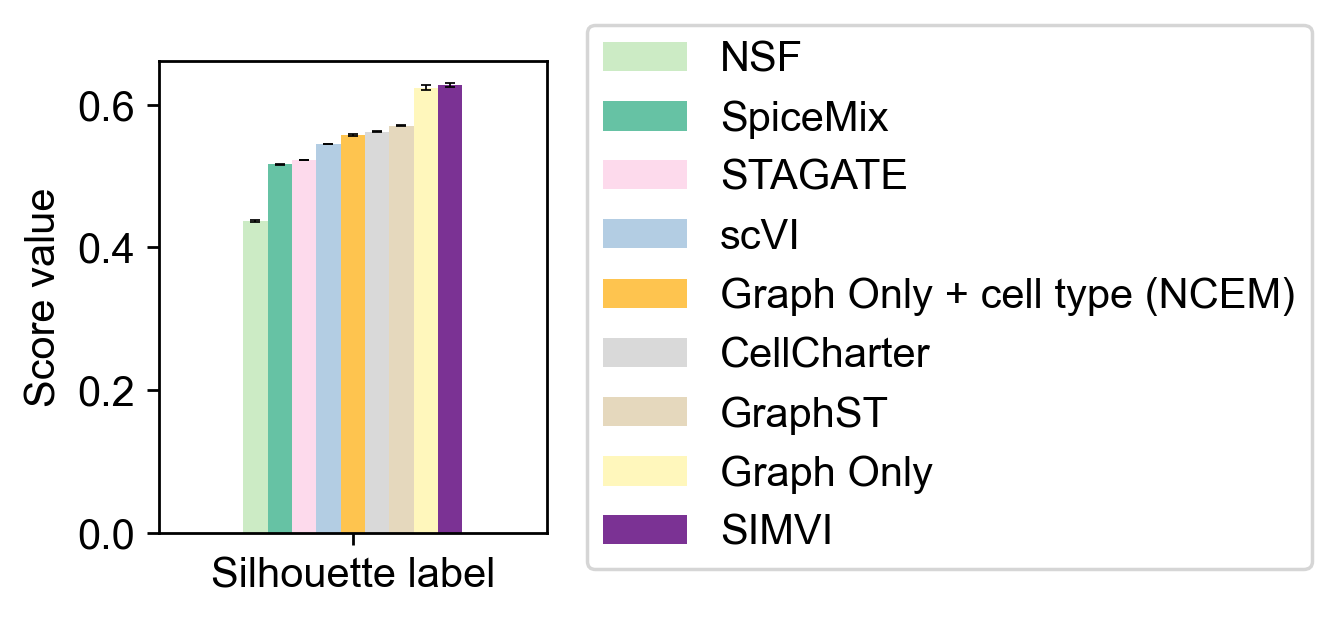

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 12
fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,    
                   'capthick': 0.5}  
color_list = ['#ccebc5','#66c2a4','#fddaec','#b3cde3','#fec44f','#d9d9d9','#e5d8bd','#fff7bc','#7b3294']
df_summary_mean.T.plot(kind="bar",rot=0,edgecolor='none',color=color_list,figsize=(2,2.5),ax=axs,yerr=df_summary_ste.T, error_kw=error_bar_style,width=0.65)

axs.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
axs.set_ylabel('Score value')
plt.savefig('slideseqv2_oversmoothing_all.pdf',bbox_inches='tight')

In [192]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
#adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)


df = pd.read_csv('slideseqv2/slideseqv2_simviniche.csv',index_col=0)


df = df.T
df['tmp'] = 0
df['tmp'][-1] = 'Batch correction'
df = df.T

bm._results = df
df_ = bm.get_results(min_max_scale=False).T

df_ = df_.drop(columns='X_pca')
df_ = df_.drop(columns='simvi2k_s2')
df_ = df_.T

df_['Total_rescaled'] = 0
df_['Total_rescaled'][:-1] = (df_['Bio conservation'][:-1] - df_['Bio conservation'][:-1].min()) / (df_['Bio conservation'][:-1].max() - df_['Bio conservation'][:-1].min())


df2 = pd.read_csv('slideseqv2/slideseqv2_simviniche_selected.csv',index_col=0)

df2 = df2.T
df2['tmp'] = 0
df2['tmp'][-1] = 'Batch correction'
df2 = df2.T


bm._results = df2
df2_ = bm.get_results(min_max_scale=False).T
df2_ = df2_.T

df2_['Total_rescaled'] = 0
df2_['Total_rescaled'][:-1] = (df2_['Bio conservation'][:-1] - df2_['Bio conservation'][:-1].min()) / (df2_['Bio conservation'][:-1].max() - df2_['Bio conservation'][:-1].min())

df_f = pd.merge(df_,df2_,left_index=True,right_index=True)
df_f['name'] = df_f.index.str[:-1]
df_summary_mean = df_f.iloc[:-1].groupby('name').mean()
df_summary_std = df_f.iloc[:-1].groupby('name').std()
df_summary_mean
df_summary_mean = df_summary_mean.iloc[[4,0,1,2,3,8,6,7,5]]
df_summary_std = df_summary_std.iloc[[4,0,1,2,3,8,6,7,5]]

df_summary_mean.index=['scVI','GraphST','STAGATE','CellCharter','NSF','SpiceMix','Graph Only','Graph Only + cell type (NCEM)', 'SIMVI']
df_summary_std.index = df_summary_mean.index

df_summary_ste = df_summary_std / np.sqrt(10)
df_summary_ste.iloc[8,:] = df_summary_ste.iloc[8,:] * np.sqrt(10) / 3
df_summary_mean


df_summary_mean = df_summary_mean[['Total_rescaled_x','Total_rescaled_y']]
df_summary_ste = df_summary_ste[['Total_rescaled_x','Total_rescaled_y']]
df_summary_mean.columns = ['All\n niche score*','Selected\n niche score*']
df_summary_ste.columns = ['All\n niche score*','Selected\n niche score*']

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/3256359913.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp'][-1] = 'Batch correction'
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/3256359913.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Total_rescaled'][:-1] = (df_['Bio conservation'][:-1] - df_['Bio conservation'][:-1].min()) / (df_['Bio conservation'][:-1].max() - df_['Bio conservation'][:-1].min())
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_75381/3256359913.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

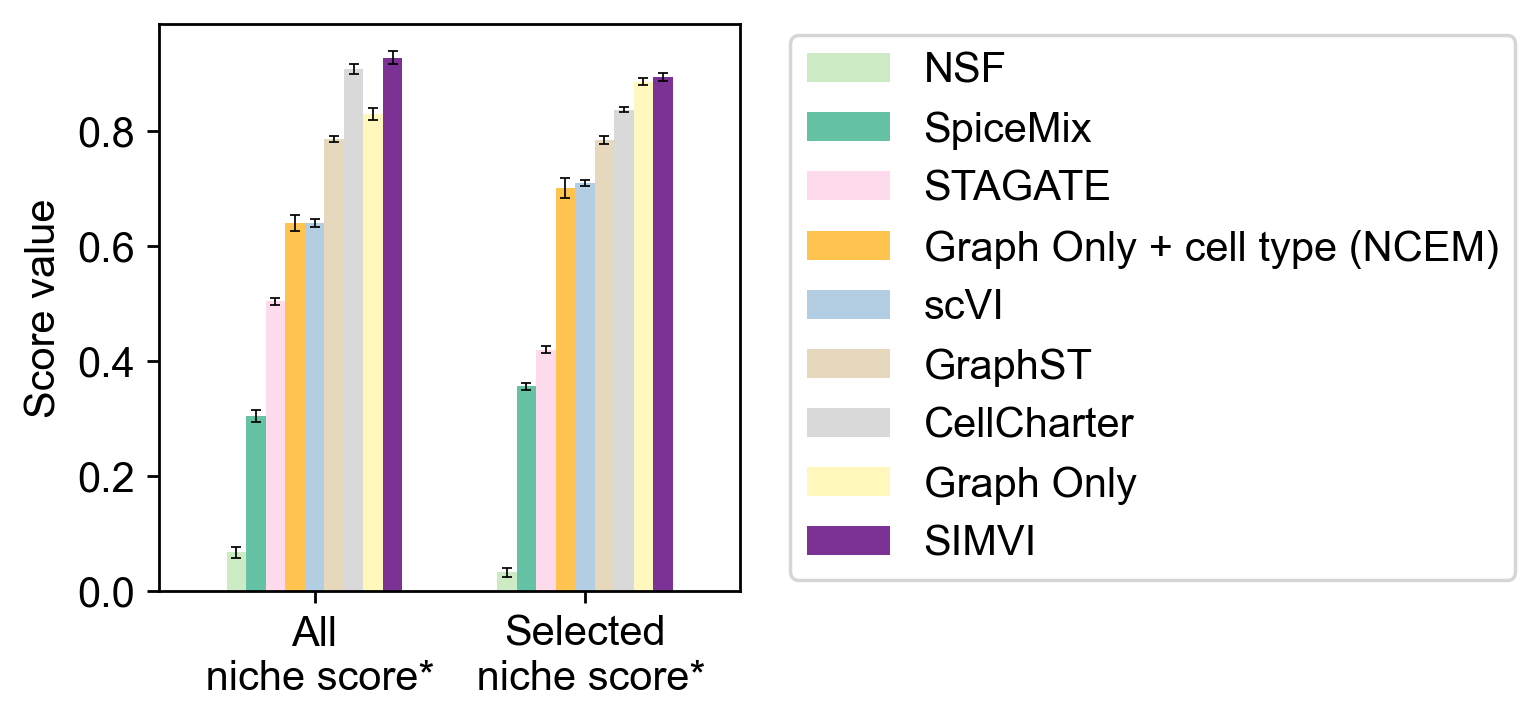

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 12
fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5, 
                   'ecolor': 'black', 
                   'capsize': 1.5,    
                   'capthick': 0.5}    
order = np.argsort(df_summary_mean['Selected\n niche score*'])
color_list = ['#ccebc5','#66c2a4','#fddaec','#fec44f','#b3cde3','#e5d8bd','#d9d9d9','#fff7bc','#7b3294']
df_summary_ste = df_summary_ste.iloc[order]
df_summary_mean = df_summary_mean.iloc[order]
df_summary_mean.T.plot(kind="bar",rot=0,edgecolor='none',color=color_list,figsize=(3,3),ax=axs,yerr=df_summary_ste.T, error_kw=error_bar_style,width=0.65)

axs.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
axs.set_ylabel('Score value')
plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)
#plt.savefig('slideseqv2_selectedniche.pdf',bbox_inches='tight')